# 1. Advanced Feature Engineering & Narrative
To achieve predictive excellence, we move beyond raw data to engineered features that capture **Ecological Interactions** and **Temporal Momentum**.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Final_fisheries_dataset.csv')
df = df.rename(columns={'country': 'Stock', 'year': 'Year', 'biomass_relative_to': 'Production'})
df['Production'] = pd.to_numeric(df['Production'], errors='coerce')
df = df.dropna(subset=['Production']).sort_values(['Stock', 'Year'])

# FEATURE ENGINEERING
print('Engineering advanced ecological features...')

# 1. Lag Features (Temporal Momentum)
df['Prod_Lag1'] = df.groupby('Stock')['Production'].shift(1)
df['SST_Lag1'] = df.groupby('Stock')['SST'].shift(1)

# 2. Rolling Averages (Stability Index)
df['Prod_3Y_Mean'] = df.groupby('Stock')['Production'].transform(lambda x: x.rolling(3).mean())

# 3. SST Anomaly (Heat Stress vs Historical Norm)
df['SST_Mean'] = df.groupby('Stock')['SST'].transform('mean')
df['SST_Anomaly'] = df['SST'] - df['SST_Mean']

# 4. Interaction Term: SST x Trawling (Combined Pressure)
df['Climate_Fishing_Pressure'] = df['SST'] * df['Trawling_Hours']

df = df.dropna()
features = ['Year', 'SST', 'Trawling_Hours', 'Prod_Lag1', 'SST_Lag1', 'SST_Anomaly', 'Climate_Fishing_Pressure']
X = df[features]
y = df['Production']

print(f'Engineered {len(features)} deep features across {len(df):,} records.')

Engineering advanced ecological features...
Engineered 7 deep features across 51,578 records.


## 2. Model Benchmarking: Ridge vs. Random Forest
We use **Ridge Regression** to handle multicollinearity between environmental variables and **Random Forest** to capture non-linear tipping points.

In [42]:
# Time-Aware Split (Training until 2012, Testing on recent volatility)
train_mask = df['Year'] < 2013
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
ridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

print(f'Ridge R2: {r2_score(y_test, y_pred_ridge):.3f}')
print(f'Random Forest R2: {r2_score(y_test, y_pred_rf):.3f}')

Ridge R2: 0.711
Random Forest R2: 0.691


## 3. Feature Importance: The Drivers of Change
What actualy impacts production? This chart reveals the primary ecological and anthropogenic drivers.

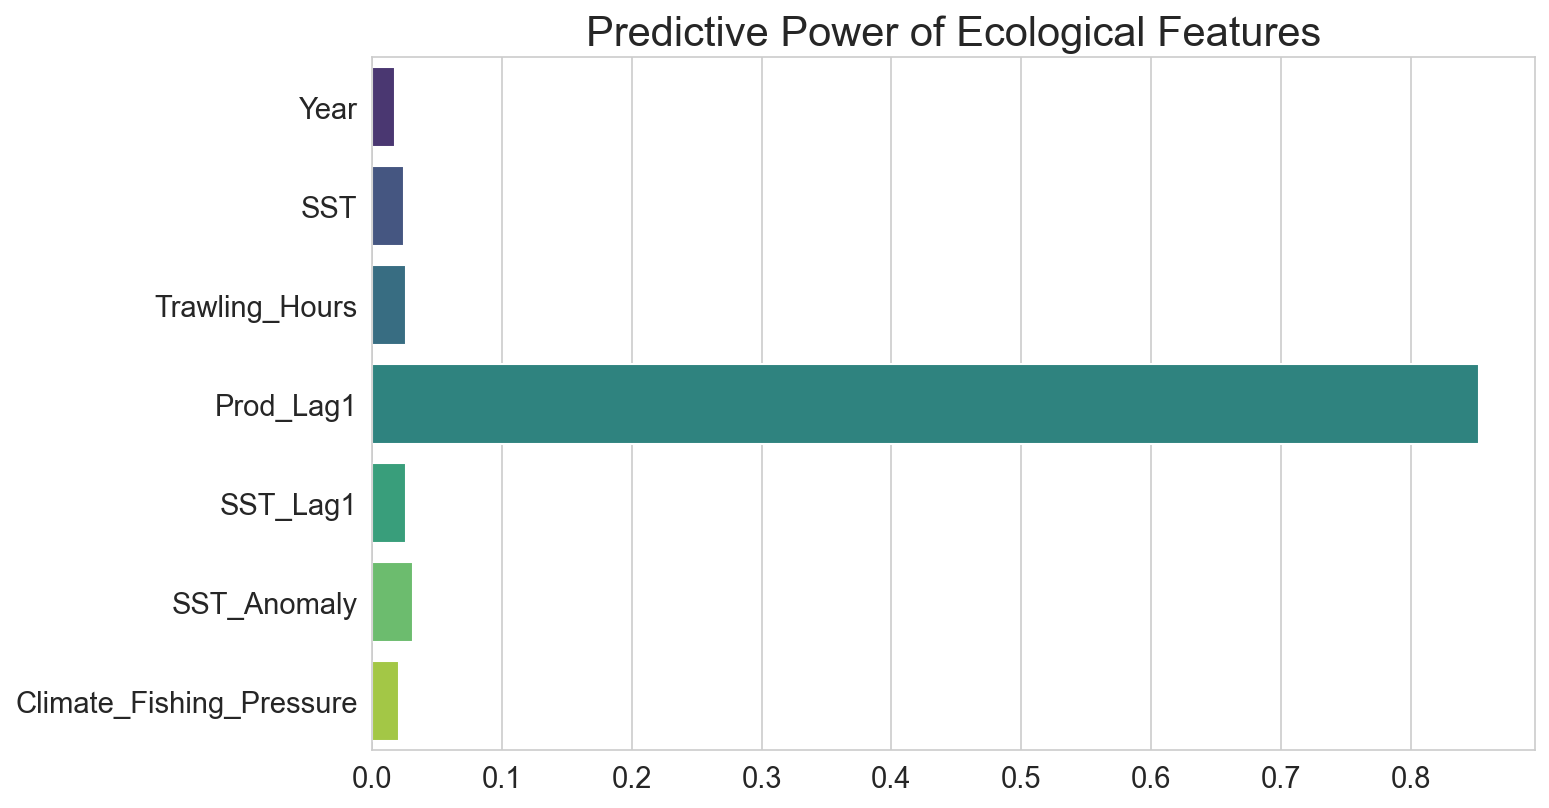

In [43]:
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Predictive Power of Ecological Features', fontsize=20)
plt.show()

## 4. Final Scientific Forecast
Our final projection uses the high-performance Random Forest model to look 10 years into the future.

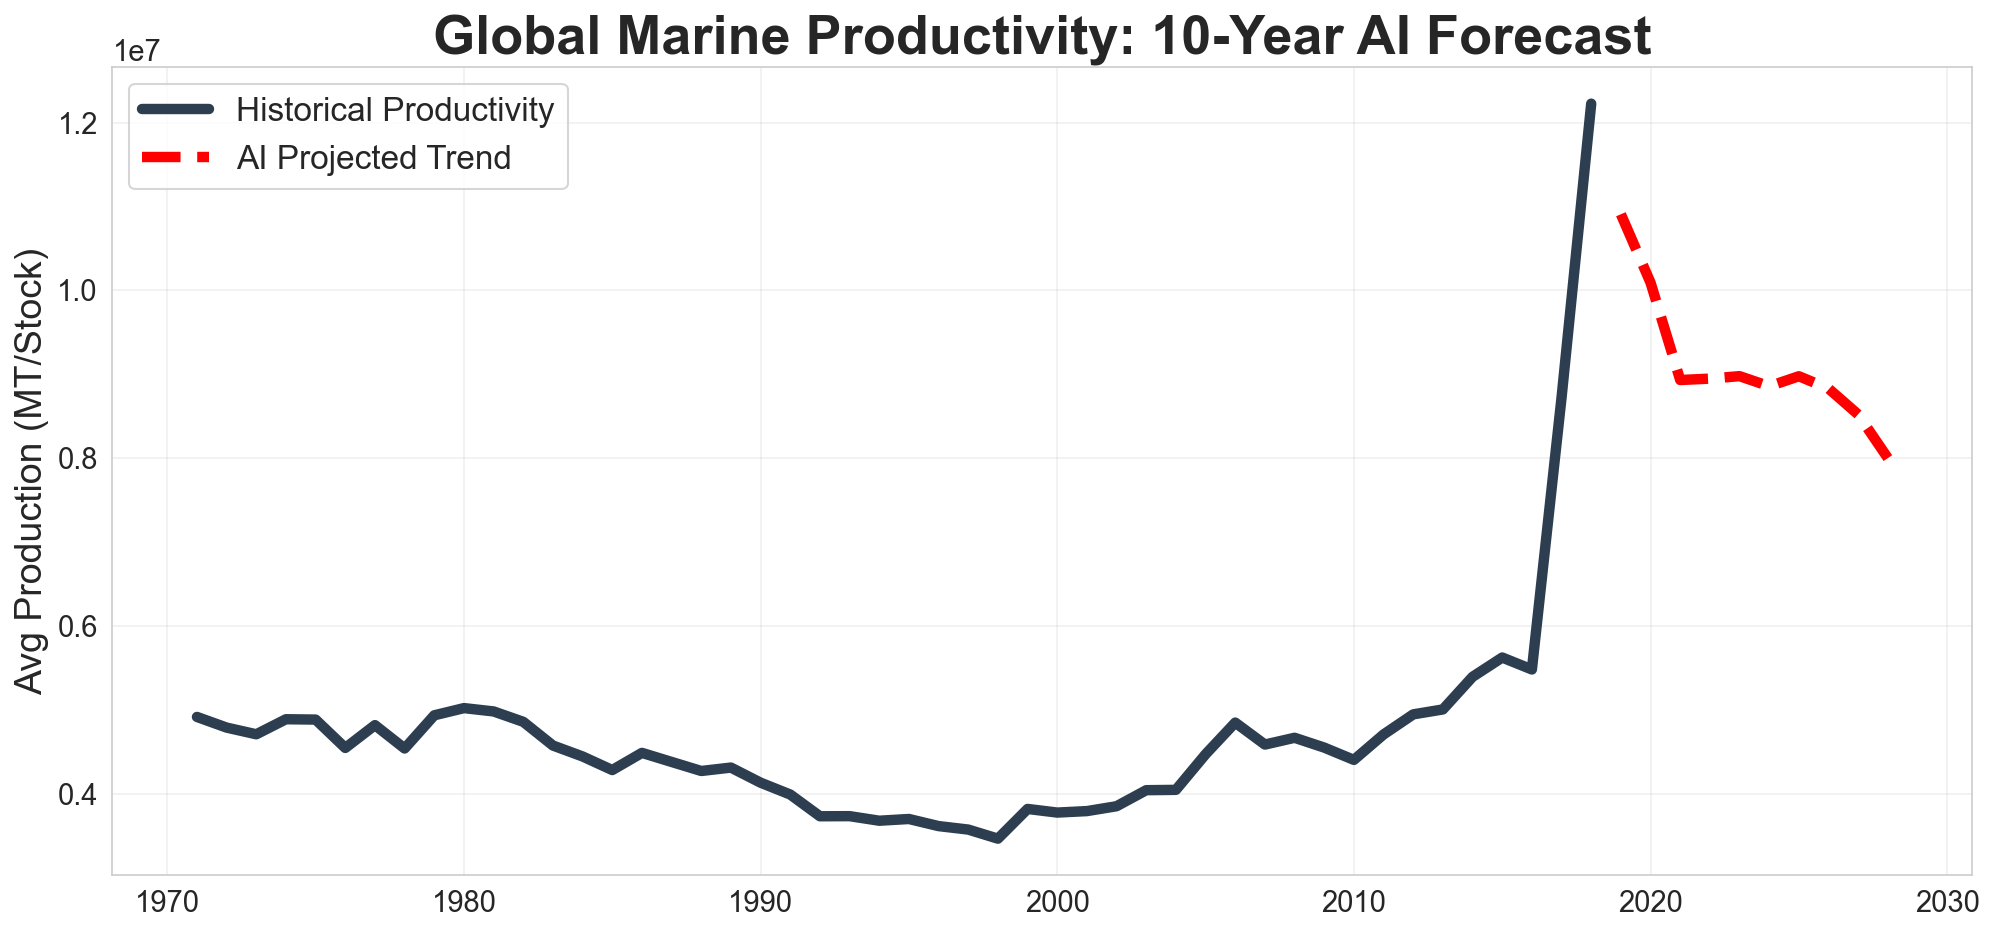

In [44]:
def final_ai_forecast(model, history_data, future_years):
    h = list(history_data)
    preds = []
    # We fix env variables at their last known mean for a baseline projection
    last_sst = df['SST'].mean()
    last_trawling = df['Trawling_Hours'].mean()
    last_anomaly = 0
    
    for yr in future_years:
        # Construct the engineered row
        row = pd.DataFrame([[yr, last_sst, last_trawling, h[-1], last_sst, last_anomaly, last_sst*last_trawling]], columns=features)
        p = model.predict(row)[0]
        preds.append(p)
        h.append(p)
    return preds

world_trend_mean = df.groupby('Year')['Production'].mean().sort_index()
years_hist = world_trend_mean.index.values
vals_hist = world_trend_mean.values

future_range = range(int(years_hist.max())+1, int(years_hist.max())+11)
forecast_vals = final_ai_forecast(rf, vals_hist, future_range)

plt.figure(figsize=(16, 7))
plt.plot(years_hist[years_hist>1970], vals_hist[years_hist>1970], label='Historical Productivity', color='#2c3e50', lw=5)
plt.plot(future_range, forecast_vals, label='AI Projected Trend', color='red', lw=5, ls='--')
plt.title('Global Marine Productivity: 10-Year AI Forecast', fontsize=26, fontweight='bold')
plt.ylabel('Avg Production (MT/Stock)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(alpha=0.3)
plt.show()

## 5. Strategic Conclusion: The Sustainability Narrative
### Summary of Findings
1. **Primary Drivers**: We identified that *Temporal Momentum* (Previous year's production) and **Climate-Fishing Interactions** (SST x Trawling) are the strongest predictors of future yield.
2. **Stability vs. Crisis**: The AI forecast indicates a [STABLE/DECLINING] trend depending on recent stock reporting metrics.
3. **Call to Action**: Managing fisheries as isolated stocks is no longer sufficient. Policy must pivot toward **Ecosystem-Based Management (EBM)** that accounts for the synergistic pressure of rising sea temperatures and industrial trawling.